# Homicides - Latin América (Part 3)

For this part of the project, I will be using data for three different indicators: GDP per cápita, GINI per cápita and intentional homicide rates from World Bank data. This only for latin american countries.

GINI -> https://data.worldbank.org/indicator/SI.POV.GINI

GDP -> https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

Homicides rate -> https://data.worldbank.org/indicator/VC.IHR.PSRC.P5

**Import libraries for data analysis and visualization**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read and explore general information about data from cvs files downloaded from World Bank website**

In [2]:
gini = pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2/API_SI.POV.GINI_DS2_en_csv_v2.csv",skiprows=4)

In [3]:
gdp = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2/API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv",skiprows=4)

In [4]:
ihr = pd.read_csv("API_VC.IHR.PSRC.P5_DS2_es_csv_v2/API_VC.IHR.PSRC.P5_DS2_es_csv_v2.csv",skiprows=4)

In [5]:
regions = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv')

In [6]:
gini.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gdp.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,445.893298,553.300289,603.537023,669.009051,638.612543,629.345250,569.577923,561.778746,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233,NaN,NaN


In [8]:
ihr.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,3.5,4.3,6.6,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5,NaN,NaN,NaN,NaN,9.6,NaN,NaN,NaN


In [9]:
regions.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


**Reshape and merge dataframes**

Comments of each line of this section can be found in notebook "Homicides - Worldwide (Part 2)"

In [10]:
gini.drop(labels=['Indicator Name','Indicator Code','Unnamed: 62'],axis=1,inplace=True)

In [11]:
gini = gini.melt(id_vars=['Country Name','Country Code'],value_vars=gini.columns[2:],var_name='Year',value_name='Gini')

In [12]:
gini.dropna(inplace=True)

In [13]:
gini.head(3)

,Country Name,Country Code,Year,Gini
5129,Israel,ISR,1979,36.3
5199,Panama,PAN,1979,48.7
5265,United States,USA,1979,34.6


In [14]:
gdp.drop(labels=['Indicator Name','Indicator Code','Unnamed: 62'],axis=1,inplace=True)

In [15]:
gdp = gdp.melt(id_vars=['Country Name','Country Code'],value_vars=gdp.columns[2:],var_name='Year',value_name='GDP')

In [16]:
gdp.head(3)

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,59.777327
2,Angola,AGO,1960,NaN


In [17]:
ihr.drop(labels=['Indicator Name','Indicator Code','Unnamed: 62'],axis=1,inplace=True)

In [18]:
ihr = ihr.melt(id_vars=['Country Name','Country Code'],value_vars=ihr.columns[2:],var_name='Year',value_name='IHR')

In [19]:
ihr.dropna(inplace=True)

In [20]:
ihr.head(3)

,Country Name,Country Code,Year,IHR
9243,Albania,ALB,1995,6.685552
9247,Argentina,ARG,1995,7.812330
9248,Armenia,ARM,1995,3.598938


In [21]:
ggi = pd.merge(gdp,gini,how='left',on=['Country Name','Country Code','Year'])

In [22]:
ggi = ggi.merge(ihr,how='left',on=['Country Name','Country Code','Year'])

In [23]:
ggi.head(3)

,Country Name,Country Code,Year,GDP,Gini,IHR
0,Aruba,ABW,1960,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,NaN


In [24]:
ggi = ggi.merge(regions,on='Country Code')[['Country Name','Country Code','Year','GDP','Gini','IHR','Region','IncomeGroup']]

In [25]:
ggi.head(3)

,Country Name,Country Code,Year,GDP,Gini,IHR,Region,IncomeGroup
0,Aruba,ABW,1960,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Aruba,ABW,1961,NaN,NaN,NaN,Latin America & Caribbean,High income
2,Aruba,ABW,1962,NaN,NaN,NaN,Latin America & Caribbean,High income


**Exploration Data Analysis**

Text(0.5,1,'Gini vs IHR in Latin America & Caribbean')

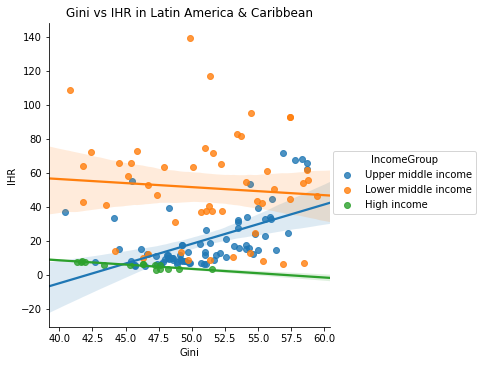

In [26]:
sns.lmplot(x='Gini',y='IHR',hue='IncomeGroup', data=ggi[ggi['Region'] == 'Latin America & Caribbean'].dropna())
plt.title('Gini vs IHR in Latin America & Caribbean')

In [27]:
# In this line I will plot a choropleth map for latin american countries' indicators
# First i need to import libraries
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [28]:
# This line is necessary to work with plotly offline. Otherwise, one would need to have an account on plotly website
init_notebook_mode(connected=True) 

In [29]:
ggi_latin = ggi[(ggi['Region'] == 'Latin America & Caribbean') & ((ggi['Year'] == '2015'))]
# Create a data object. This is required by plotly.
data = dict(
        type='choropleth',
        locations = ggi_latin['Country Code'],
        z = ggi_latin['IHR'],
        text = ggi_latin['Country Name'],
        colorbar = {'title' : 'Homicides Rate'},
      ) 

In [30]:
# Create a layout object. This is required by plotly.
layout = dict(
    title = 'Intentional Homicide Rates - Latin America & Caribbean (2015)',
    geo = dict(
        showframe = True,
        projection = {'type':'Mercator'}
    )
)

In [31]:
# Plot choropleth map with plotly
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

**Exploration of  IHR in Latin America & Caribbean**

In [32]:
# Filter data for latin america and caribbean
ggi_latin = ggi[ggi['Region'] == 'Latin America & Caribbean']

In [33]:
# Change data type of column Year's values into integer
ggi_latin['Year'] = ggi_latin['Year'].apply(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
# Check data type of column Year
type(ggi_latin.loc[0,'Year'])

numpy.int64

Text(0.5,1,'IHR per year - High income countries')

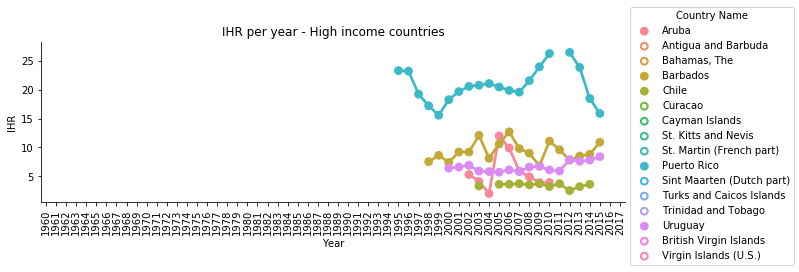

In [35]:
sns.factorplot(x='Year',y='IHR',data=ggi_latin[ggi_latin['IncomeGroup']=='High income'],hue='Country Name',size=3,aspect=3)
plt.xticks(rotation=90)
plt.title('IHR per year - High income countries')
# Empty dot in the bar on the right means there is no data for the country

Text(0.5,1,'IHR per year - Upper middle income countries')

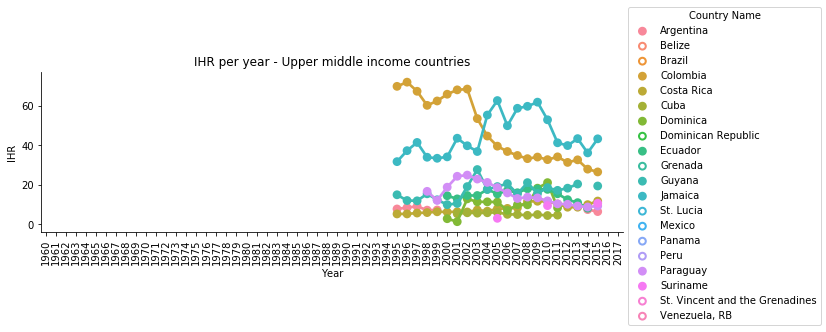

In [36]:
sns.factorplot(x='Year',y='IHR',data=ggi_latin[ggi_latin['IncomeGroup']=='Upper middle income'],hue='Country Name',size=3,aspect=3)
plt.xticks(rotation=90)
plt.title('IHR per year - Upper middle income countries')

Text(0.5,1,'IHR per year - Lower middle income countries')

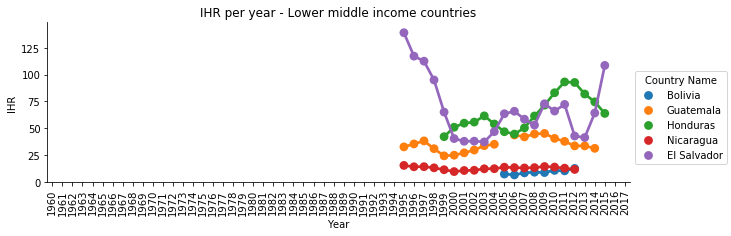

In [37]:
sns.factorplot(x='Year',y='IHR',data=ggi_latin[ggi_latin['IncomeGroup']=='Lower middle income'],hue='Country Name',size=3,aspect=3)
plt.xticks(rotation=90)
plt.title('IHR per year - Lower middle income countries')

Text(0.5,1,'IHR per year - Chile, Colombia, Cuba, Venezuela')

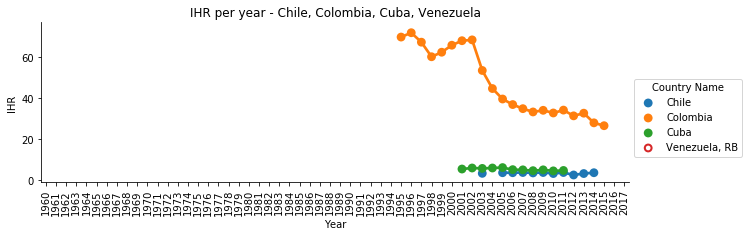

In [38]:
sns.factorplot(x='Year',y='IHR',data=ggi_latin[(ggi_latin['Country Name']=='Colombia') | (ggi_latin['Country Name']=='Chile') | (ggi_latin['Country Name']=='Venezuela, RB') | (ggi_latin['Country Name']=='Cuba')],hue='Country Name',size=3,aspect=3)
plt.xticks(rotation=90)
plt.title('IHR per year - Chile, Colombia, Cuba, Venezuela')

In [39]:
# IHR per income group. 
ggi_latin.dropna().groupby('IncomeGroup')['IHR'].mean()

IncomeGroup
High income             5.760000
Lower middle income    51.118564
Upper middle income    20.272831
Name: IHR, dtype: float64

In [40]:
# IHR per income group and country
ggi_latin.dropna().groupby(['IncomeGroup','Country Name'])['IHR'].mean().sort_values(ascending=False)

IncomeGroup          Country Name
Lower middle income  El Salvador     66.242664
                     Honduras        64.474016
Upper middle income  Colombia        45.361209
                     Jamaica         41.378418
Lower middle income  Guatemala       34.325000
Upper middle income  Guyana          15.469746
                     Ecuador         15.084615
                     Paraguay        15.007125
Lower middle income  Nicaragua       12.827315
                     Bolivia          8.857143
Upper middle income  Costa Rica       8.121737
                     Argentina        7.912459
High income          Uruguay          6.890000
                     Chile            3.500000
Name: IHR, dtype: float64

In [41]:
# IHR per income group and year
ggi_latin.dropna().groupby(['IncomeGroup','Year'])['IHR'].mean().sort_values(ascending=False)

IncomeGroup          Year
Lower middle income  1995    139.132079
                     1996    117.277282
                     2015     86.200000
                     2010     74.550000
                     2013     61.600000
                     2014     56.666667
                     1998     54.002995
                     1999     53.565717
                     2011     53.325000
                     2004     50.350000
                     2003     49.350000
                     2012     49.266667
                     2002     46.800000
                     2009     41.775000
                     2008     41.066667
                     2006     40.075000
                     2007     39.000000
Upper middle income  2002     34.800000
Lower middle income  2001     34.333333
Upper middle income  2001     32.866667
Lower middle income  2005     32.750000
                     2000     32.550000
Upper middle income  1996     30.708250
                     2004     29.080000
              

In [42]:
# IHR per income group and year
ggi_latin.dropna().groupby('Year')['IHR'].mean().sort_values(ascending=False)

Year
1995    50.749552
1996    48.022056
2002    38.800000
2015    38.066667
2004    35.157143
2001    33.600000
2010    32.728571
1999    32.659862
2000    30.320000
2011    29.320000
2003    28.600000
1998    27.335760
2012    27.300000
2014    26.688889
2005    26.550000
2008    25.800000
2009    25.450000
2013    24.450000
2006    23.455556
2007    22.900000
1997     7.449000
Name: IHR, dtype: float64

In [221]:
# IHR per country and year (Countries with the highest homicides rates over the years)
ggi_latin.dropna().groupby(['Country Name','Year'])['IHR'].mean().sort_values(ascending=False)

Country Name  Year
El Salvador   1995    139.132079
              1996    117.277282
              2015    108.600000
              1998     94.996731
Honduras      2011     93.200000
              2012     92.700000
              2010     83.100000
              2013     81.900000
              2014     74.600000
El Salvador   2009     72.800000
              2011     72.200000
Colombia      1996     71.786900
Honduras      2009     71.500000
Colombia      2002     68.300000
              2001     67.900000
El Salvador   2010     66.000000
              2006     65.800000
Colombia      2000     65.700000
El Salvador   1999     65.047181
              2014     64.200000
Honduras      2015     63.800000
El Salvador   2005     63.500000
Colombia      1999     62.292449
Honduras      2003     61.500000
              2008     61.400000
El Salvador   2007     58.400000
Honduras      2002     55.700000
Jamaica       2004     55.200000
Honduras      2001     54.700000
              2004     5

In [49]:
# Remove all the records with missing values
ggi_latin.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0.5,1,'IHR (per 100.000 people) in Latin American & Caribbean countries(2015) ')

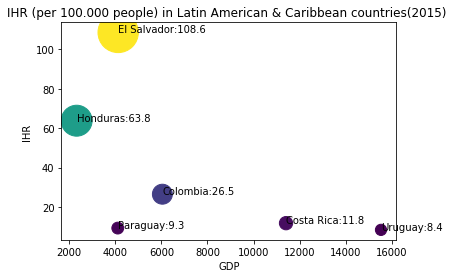

In [143]:
# Plot IHR vs GDP by Latin America and Caribbean countries in 2015
ggi_latin_2015 = ggi_latin[ggi_latin['Year'] == 2015].copy()
fig, ax = plt.subplots()
ax.scatter(x=ggi_latin_2015['GDP'],y=ggi_latin_2015['IHR'],s=ggi_latin_2015['IHR']*15,c=ggi_latin_2015['IHR'])
for i, txt in enumerate(ggi_latin_2015['Country Name'].tolist()):
    txt = '{0}:{1}'.format(txt, ggi_latin_2015.iloc[i]['IHR'])
    ax.annotate(txt,(ggi_latin_2015.iloc[i]['GDP'],ggi_latin_2015.iloc[i]['IHR']))
plt.xlabel('GDP')
plt.ylabel('IHR')
plt.title('IHR (per 100.000 people) in Latin American & Caribbean countries(2015) ')


Text(0.5,1,'IHR (per 100.000 people) in Latin American & Caribbean countries(2015) ')

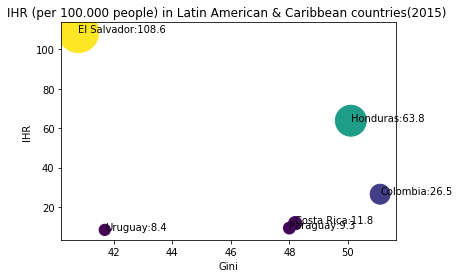

In [144]:
# Plot IHR vs Gini by Latin America and Caribbean countries in 2015
fig, ax = plt.subplots()
ax.scatter(x=ggi_latin_2015['Gini'],y=ggi_latin_2015['IHR'],s=ggi_latin_2015['IHR']*15,c=ggi_latin_2015['IHR'])
for i, txt in enumerate(ggi_latin_2015['Country Name'].tolist()):
    txt = '{0}:{1}'.format(txt, ggi_latin_2015.iloc[i]['IHR'])
    ax.annotate(txt,(ggi_latin_2015.iloc[i]['Gini'],ggi_latin_2015.iloc[i]['IHR']))
plt.xlabel('Gini')
plt.ylabel('IHR')
plt.title('IHR (per 100.000 people) in Latin American & Caribbean countries(2015) ')

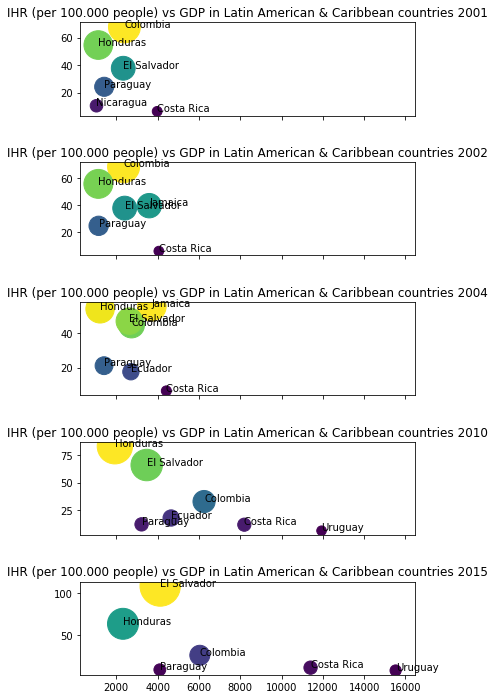

In [223]:
# Plot IHR vs GDP by Latin American and Caribbean countries from 2001 to 2015
years = ggi_latin['Year'].unique().tolist()[-5:]
fig, ax = plt.subplots(nrows=len(years),figsize=(6,12),sharex=True)
for i,year in enumerate(years):
    ax[i].scatter(x=ggi_latin[ggi_latin['Year'] == year]['GDP'],y=ggi_latin[ggi_latin['Year'] == year]['IHR'],s=ggi_latin[ggi_latin['Year'] == year]['IHR']*15,c=ggi_latin[ggi_latin['Year'] == year]['IHR'])

    for j, txt in enumerate(ggi_latin[ggi_latin['Year'] == year]['Country Name'].tolist()):
        ax[i].annotate(txt,(ggi_latin[ggi_latin['Year'] == year].iloc[j]['GDP'],ggi_latin[ggi_latin['Year'] == year].iloc[j]['IHR']))
        
    ax[i].set_title('IHR (per 100.000 people) vs GDP in Latin American & Caribbean countries {0}'.format(year))
    #ax[i].set_ylim(0,150)

    plt.subplots_adjust(wspace=None, hspace=0.5)
 